# From the given information of the breast cancer dataset , we need to classify whether it is a malignant cancer or benign cancer

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


# Displaying the target names in the dataset

# Display first few rows of the dataset

In [73]:
df = pd.read_csv('../input/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Information about the dataset - Total 33 columns/features and no null entries

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Remove the last column .i.e the 33rd one as it is not needed

In [75]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

# Lets know how many values for malignant and for benign type of cancer

In [76]:
print ("Total number of diagnosis are ", str(df.shape[0]), ", ", df.diagnosis.value_counts()['B'], "Benign and Malignant are",
       df.diagnosis.value_counts()['M'])

Total number of diagnosis are  569 ,  357 Benign and Malignant are 212


In [77]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Our dataset already contains the mean values of all the columns 

In [78]:
featureMeans = list(df.columns[1:11])

#  Lets find the correlation between columns

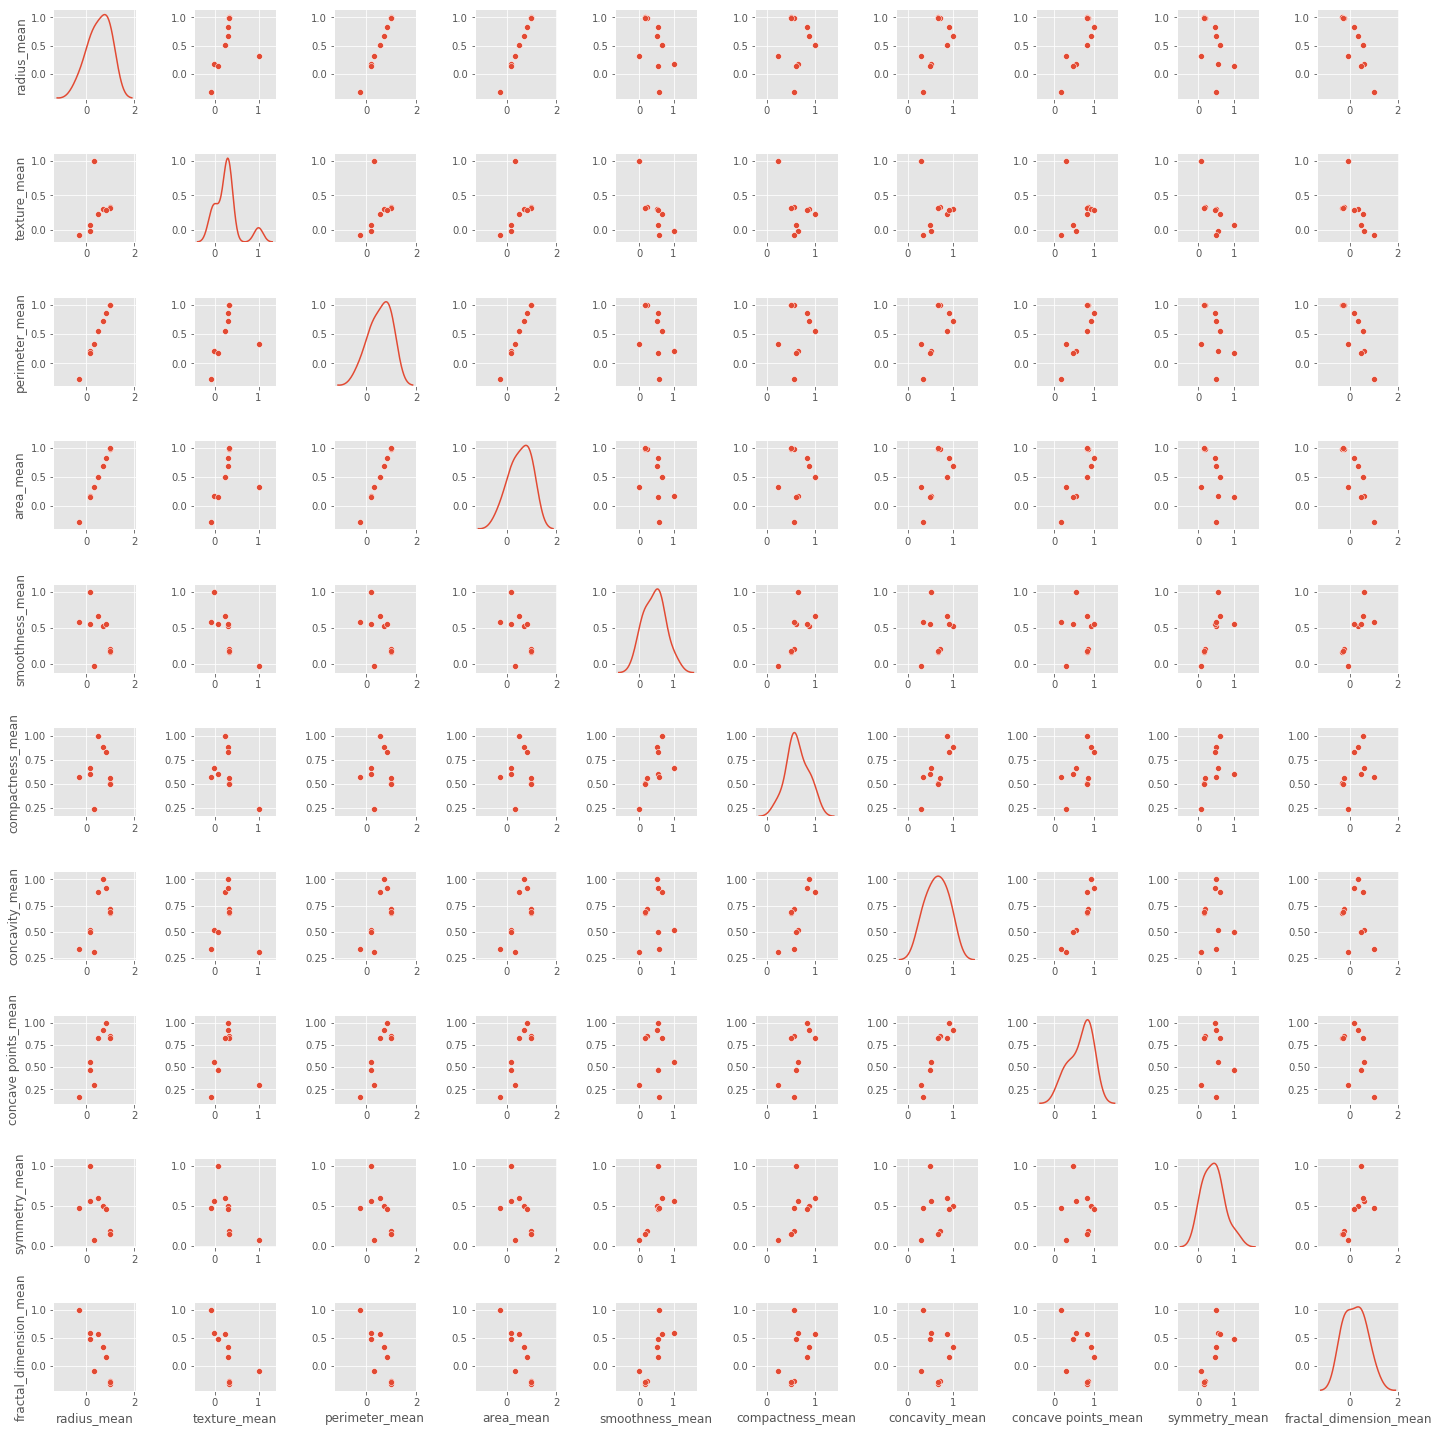

In [79]:
import seaborn as sns
correlationData = df[featureMeans].corr()
sns.pairplot(df[featureMeans].corr(), diag_kind='kde', size=2);

# Pairplot is too big and complicated to understand . Lets try a heatmap

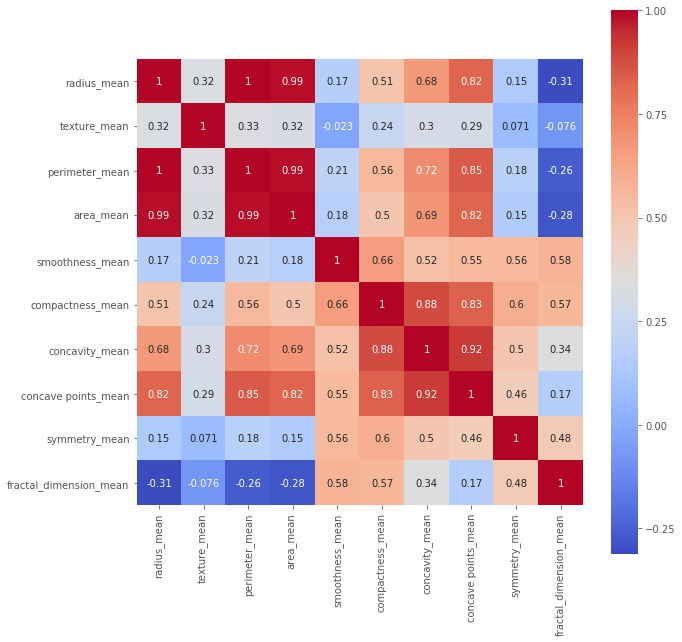

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

# Plotting the distribution of each type of diagnosis for some of the mean features.

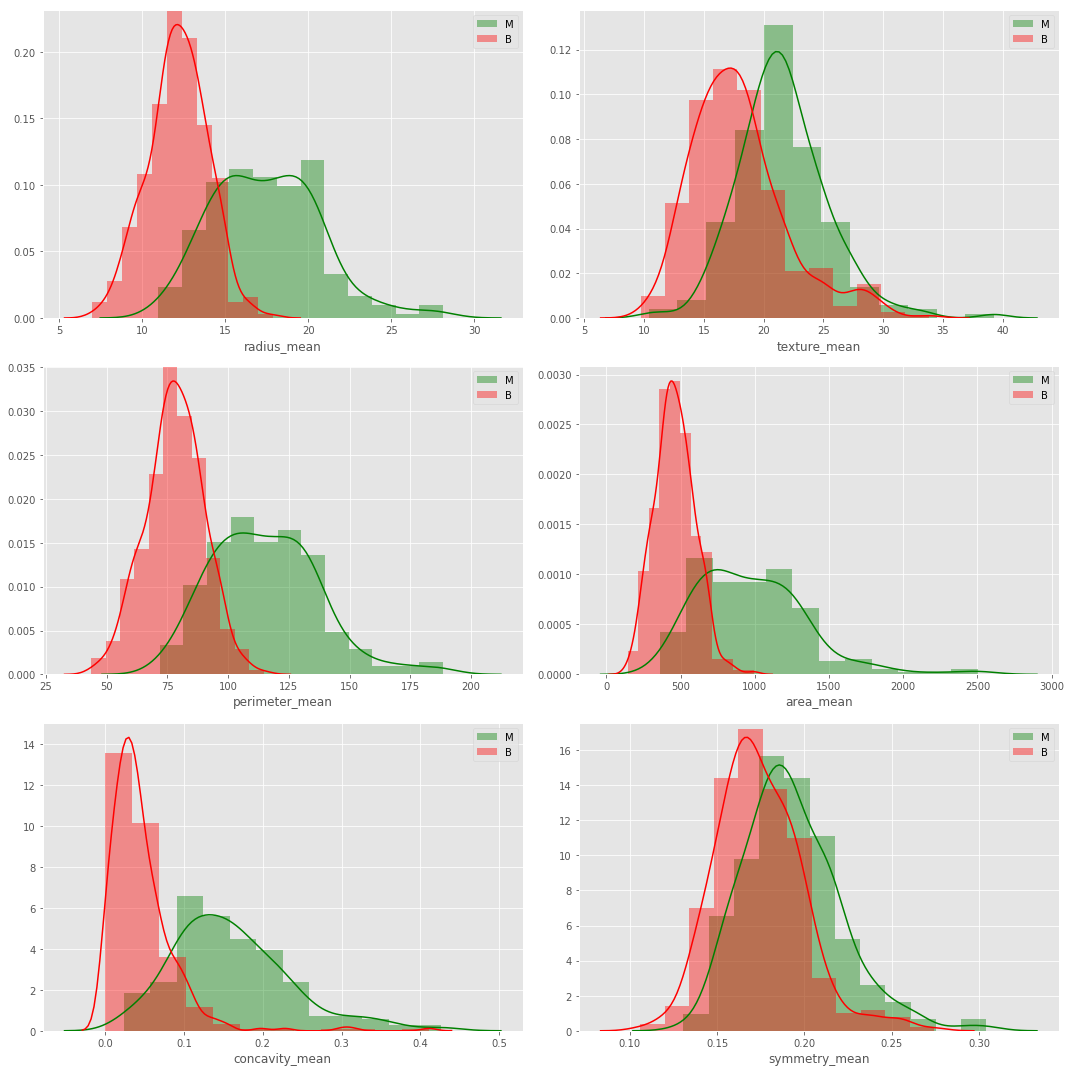

In [81]:
bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.distplot(df[df['diagnosis']=='M']['radius_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['radius_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.distplot(df[df['diagnosis']=='M']['texture_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['texture_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.distplot(df[df['diagnosis']=='M']['perimeter_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['perimeter_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
sns.distplot(df[df['diagnosis']=='M']['area_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
sns.distplot(df[df['diagnosis']=='M']['concavity_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['concavity_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
sns.distplot(df[df['diagnosis']=='M']['symmetry_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['symmetry_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Lets start applying Machine Learning Models

In [82]:
X = df.loc[:,featureMeans]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
predicted = nbclf.predict(X_test)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.90
Accuracy of GaussianNB classifier on test set: 0.95


In [84]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (nbclf, metrics.classification_report(y_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
             precision    recall  f1-score   support

          B       0.93      0.99      0.96        71
          M       0.97      0.88      0.93        43

avg / total       0.95      0.95      0.95       114


Confusion matrix:
[[70  1]
 [ 5 38]]


In [85]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, prediction)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.90
Accuracy of GaussianNB classifier on test set: 0.94

 Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          B       0.92      0.99      0.95        71
          M       0.97      0.86      0.91        43

avg / total       0.94      0.94      0.94       114


Confusion matrix:
[[70  1]
 [ 6 37]]
